In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sc
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib import gridspec
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
Z_100Tc=43
A_100Tc=100

Z_127Xe=54
A_127Xe=127

Z_76Ge=32
A_76Ge=76

Привиденная энергия вылетающего электрона: $\epsilon_e = \frac{E_{\nu}-Q_k}{m_e} + 1$

In [3]:
def e_e_func(E_nu, E_k, Q_EC):
    #Считаем привиденную энергию вылетающего электрона. Если энергия налетающего нейтрино E_nu
    #меньше порога, возвращаем 0 для обнуления итогового сечения
    #E_nu in MeV
    q=Q_k_func(E_k, Q_EC) #порог реакции
    if E_nu>q: return 1+(E_nu-q)/0.511
    else: return 0 

Привиденный импульс электрона: $\pi_e=\sqrt{\epsilon_e^2 -1}$

In [4]:
def Pi_e_func(e_e):
    #Привиденный импульс электрона, вычисляется через привиденную энергию; ** означает степень  
    return np.sqrt(e_e**2 - 1)

Ферми функция через гамму: $F(Z_f, E) = 2(\gamma_1+1)(2pR_{A})^{2(\gamma_1-1)}\frac{|\Gamma(\gamma_1+iy)|^2}{[\Gamma(2\gamma_1+1)]^2}e^{{\pi}y}$  
$y = \frac{{\alpha}Z_fE}{p}$, $\gamma_1 = \sqrt{1-(Z_f\alpha)^2}$, $R_A = 1.2A^{1/3}$ fm.  
E, p в единицах mc^2 и mc #см. начало Behrens and Janecki

In [5]:
def Fermi_via_Gamma(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    R = 1.2*np.cbrt(A)
    
    #part1 = 2*(gamma1+1)*(2*p*R)**(2*gamma1-2)
    part1 = 4*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4

def Fermi_via_Gamma_corr(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    R = 3.90625*10**(-3)*np.cbrt(A)
    
    part1 = 2*(gamma1+1)*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4

def Fermi_via_Gamma_corr2(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.0fm = 2.60417*10**(-3) h_/(m_e*c)
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    R = 3.125*10**(-3)*np.cbrt(A)
    
    part1 = 4*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4

def Fermi_via_Gamma_corr3(Z, A, e_e, R):
    #input энергия электрона в кэв
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    #R = 3.125*10**(-3)*np.cbrt(A)
    
    part1 = 4*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4

def Fermi_via_Gamma_kappa(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    R = 3.125*10**(-3)*np.cbrt(A)
    
    delta1 = ((alpha*Z*R)/(2*gamma1+1)) * (2/(gamma1+1)) * ((2*gamma1+3)*E + gamma1/E)
    
    delta2_b = alpha*Z
    delta2_N_p1 = (gamma1+1) * (-6*E**4 + 12*E**2 - 6)
    delta2_N_p2 = delta2_b**2 * (26*E**4 - 28*E**2 + 2)
    delta2_N_p3 = gamma1*delta2_b**2 * (24*E**4 - 24*E**2)
    delta2_N_p4 = delta2_b**4 * (-8*E**4 + 26*E**2 + 12)
    delta2_N_p5 = gamma1*delta2_b**4 * (24*E**2 + 6)
    delta2_N_p6 = delta2_b**6 * (-8*E**2 -8)
    delta2_N = delta2_N_p1 + delta2_N_p2 + delta2_N_p3 + delta2_N_p4 + delta2_N_p5 + delta2_N_p6
    
    delta2 = delta2_N*R**2 / ((delta2_b**2+E**2-1) * (2*gamma1+1)**2 * (gamma1+1)**2)
    
    kappa = 1 - delta1 + delta2
    
    part1 = 2*(gamma1+1)*(2*p*R)**(2*gamma1-2)
#    part1 = 4*(2*p*R)**(2*gamma1-2)
    part2 = np.square(np.abs(sc.special.gamma(gamma1+1j*y)))
    part3 = np.square(sc.special.gamma(2*gamma1+1))
    part4 = np.exp(np.pi*y)
    return part1*(part2/part3)*part4*kappa

def return_delta1_delta2(Z, A, e_e):
    #input энергия электрона в кэв
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    R = 3.90625*10**(-3)*np.cbrt(A)
    
    delta1 = ((alpha*Z*R)/(2*gamma1+1)) * (2/(gamma1+1)) * ((2*gamma1+3)*E + gamma1/E)
    
    delta2_b = alpha*Z
    delta2_N_p1 = (gamma1+1) * (-6*E**4 + 12*E**2 - 6)
    delta2_N_p2 = delta2_b**2 * (26*E**4 - 28*E**2 + 2)
    delta2_N_p3 = gamma1*delta2_b**2 * (24*E**4 - 24*E**2)
    delta2_N_p4 = delta2_b**4 * (-8*E**4 + 26*E**2 + 12)
    delta2_N_p5 = gamma1*delta2_b**4 * (24*E**2 + 6)
    delta2_N_p6 = delta2_b**6 * (-8*E**2 -8)
    delta2_N = delta2_N_p1 + delta2_N_p2 + delta2_N_p3 + delta2_N_p4 + delta2_N_p5 + delta2_N_p6
    
    delta2 = delta2_N*R**2 / ((delta2_b**2+E**2-1) * (2*gamma1+1)**2 * (gamma1+1)**2)
    
    return delta1, delta2

In [6]:
2*(np.sqrt(1-(Z_127Xe*(1/137))**2)+1), 2*(np.sqrt(1-(Z_76Ge*(1/137))**2)+1)

(3.83808316902888, 3.9446767877003617)

In [7]:
return_delta1_delta2(Z=35, A=83, e_e=np.arange(100, 1100, 100))

(array([0.01012126, 0.01140648, 0.01273402, 0.01408995, 0.01546583,
        0.01685629, 0.0182577 , 0.01966757, 0.02108409, 0.02250595]),
 array([ 6.75559880e-07, -3.73998747e-05, -8.12355868e-05, -1.30831576e-04,
        -1.86187844e-04, -2.47304388e-04, -3.14181211e-04, -3.86818311e-04,
        -4.65215688e-04, -5.49373343e-04]))

In [8]:
return_delta1_delta2(Z=35, A=83, e_e=np.arange(1000, 11000, 1000))

(array([0.02250595, 0.0368777 , 0.05136137, 0.06588253, 0.08042078,
        0.09496823, 0.10952122, 0.12407778, 0.1386368 , 0.15319758]),
 array([-0.00054937, -0.00170777, -0.00344218, -0.00575263, -0.00863911,
        -0.01210161, -0.01614014, -0.0207547 , -0.02594528, -0.0317119 ]))

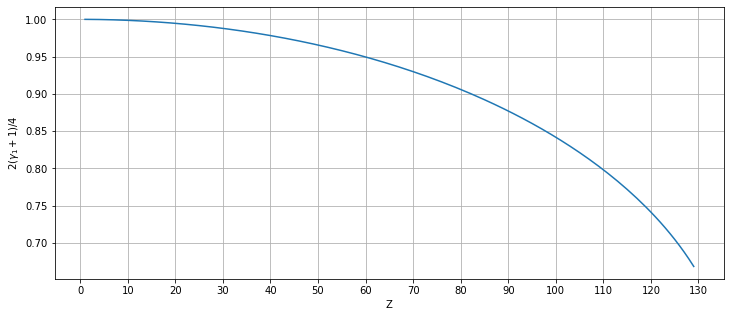

In [10]:
plt.figure(figsize=(12,5))
Z_range = np.arange(1,130)
gamma_value = 2*(np.sqrt(1-(Z_range*(1/137))**2)+1)
plt.plot(Z_range, gamma_value/4)
plt.xlabel('Z')
plt.ylabel('$2(\gamma_1+1)/4$')
plt.grid(True)
plt.xticks(np.arange(0,140,10))
plt.show()

In [11]:
for i, elem in enumerate([5,4,3,2,1]): print(i, elem)

0 5
1 4
2 3
3 2
4 1


In [12]:
a_m1_t = [0.115, -1.8123, 8.2498, -11.223, -14.854, 32.086]
a_0_t = [-0.00062, 0.007165, 0.01841, -0.53736, 1.2691, -1.5467]
a_1_t = [0.02482, -0.5975, 4.84199, -15.3374, 23.9774, -12.6534]
a_2_t = [-0.14038, 3.64953, -38.8143, 172.1368, -346.708, 288.7873]
a_3_t = [0.008152, -1.15664, 49.9663, -273.711, 657.6292, -603.7033]
a_4_t = [1.2145, -23.9931, 149.9718, -471.2985, 662.1909, -305.6804]
a_5_t = [-1.5632, 33.4192, -255.1333, 938.5297, -1641.2845, 1095.358]



def L_0_corr(Z, A, e_e, R):
    #input энергия электрона в кэв
    #works for p<45 and Z<60
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    #R = 3.125*10**(-3)*np.cbrt(A)
    
    p1 = 1 + (13/60)*(alpha*Z)**2 
    p2 = (alpha*Z*E*R*(41-26*gamma1))/(15*(2*gamma1-1))
    p3 = (alpha*Z*R*gamma1*(17-2*gamma1))/(30*E*(2*gamma1-1))
    p4 = 0.41*(R-0.0164)*(alpha*Z)**4.5
    a_m1 = (R/E)*np.sum([b*(alpha*Z)**(i+1) for i, b in enumerate(a_m1_t)])
    a_others = 0
    for n, a_n in enumerate([a_0_t, a_1_t, a_2_t, a_3_t, a_4_t, a_5_t]):
        a_others += np.sum([b*(alpha*Z)**(i+1) for i, b in enumerate(a_n)])*(E*R)**n
    return p1 - p2 - p3 + a_m1 + a_others + p4
    

In [13]:
def U_corr(Z, A, e_e, R):
    #input энергия электрона в кэв
    #works for p<45 and Z<60
    alpha = 1/137
    E = 1 + e_e/511 #полная энергия электрона в единицах mc^2
    p = Pi_e_func(E)
    y = alpha*Z*E/p
    gamma1 = np.sqrt(1-(Z*alpha)**2)
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    #R = 3.125*10**(-3)*np.cbrt(A)
    a0 = -5.6*10**(-5) - Z*4.94*10**(-5) + (Z**2)*6.23*10**(-8)
    a1 = 5.17*10**(-6) + Z*2.517*10**(-6) + (Z**2)*2.00*10**(-8)    
    a2 = -9.17*10**(-8) + Z*5.53*10**(-9) + (Z**2)*1.25*10**(-10)
    return 1 + a0*p**0 + a1*p**1 + a2*p**2

In [14]:
def Fermi_func_total(Z, A, e_e, r = 3.125):
    #R = 1.5*np.cbrt(A) 
    # 1 cm = 2.60416*10**10 h_/(m_e*c)    h_ = h/2pi
    # 1.2fm = 3.125*10**(-3) h_/(m_e*c)
    # 1.5fm = 3.90625*10**(-3) h_/(m_e*c)
    R = r*10**(-3)*np.cbrt(A)
    return Fermi_via_Gamma_corr3(Z, A, e_e, R)*L_0_corr(Z, A, e_e, R) \
*U_corr(Z, A, e_e, R)

### Ферми функция из таблиц Суслова. Z - атомный номер исходного ядра

In [15]:
Suslov_Z31 = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=31.xls')
Suslov_Z42 = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=42.xls')
Suslov_Z53 = pd.read_excel('../../fermi_func_tables/suslov/suslov_Z=53.xls')
#Fermi_func.info()

def Suslov_func(e_e, Suslov_data):
    #input энергия электрона в кэв
    return np.interp(x = e_e, xp = Suslov_data['E_kev'], 
                     fp = Suslov_data['Value'])
def Suslov_func2(e_e, Suslov_data):
    #input энергия электрона в кэв
    cs = interp1d(Suslov_data['E_kev'], Suslov_data['Value'], kind='cubic')
    return cs(e_e)

In [16]:
Suslov_Z31.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E_kev   100 non-null    int64  
 1   Value   100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [17]:
e_e = np.linspace(5,10000, 1000) #энергия электрона в кэВ

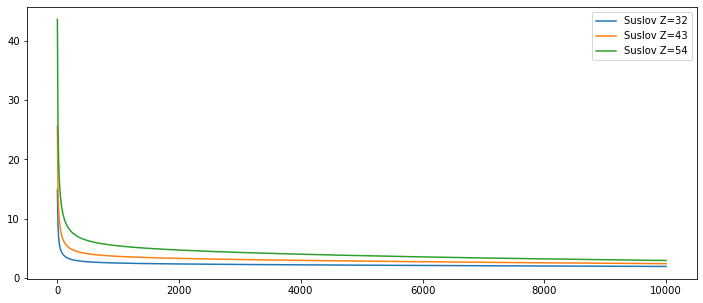

In [18]:
plt.figure(figsize=(12,5))
plt.plot(e_e, Suslov_func(e_e, Suslov_Z31), label='Suslov Z=32')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z42), label='Suslov Z=43')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), label='Suslov Z=54')
plt.legend()
plt.show()

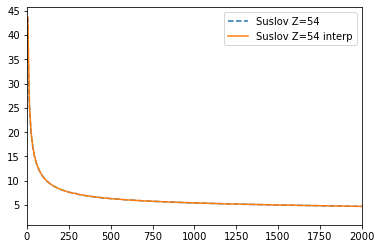

In [19]:
plt.plot(Suslov_Z53["E_kev"].values, Suslov_Z53["Value"].values, ls='--', label='Suslov Z=54')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), ls='-', label='Suslov Z=54 interp')
plt.xlim(0,2000)
plt.legend()
plt.show()

### Fermi-function from Numerical Tables for Beta-Decay and Electron Capture 
### Z и A даны для дочернего ядра

In [20]:
Janecki_Z32 = pd.read_excel('../../fermi_func_tables/from_1968/Janecki Z32.xls')
Janecki_Z43 = pd.read_excel('../../fermi_func_tables/from_1968/Janecki Z43.xls')
Janecki_Z54 = pd.read_excel('../../fermi_func_tables/from_1968/Janecki Z54.xls')
Janecki_Z32.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p0      48 non-null     float64
 1   Value   48 non-null     float64
dtypes: float64(2)
memory usage: 896.0 bytes


In [21]:
Janecki_Z54.head()

,p0,Value,L0
0,0.1,68.550,1.0170
1,0.2,34.627,1.0170
2,0.3,23.465,1.0169
3,0.4,17.995,1.0167
4,0.5,14.807,1.0165


In [22]:
def Janecki_func(e_e, Janecki_data):
    #input энергия электрона в кэв
    E = 1 + e_e/511 # полная энергия электрона в единицах mc^2
    #E = e_e/511
    p = Pi_e_func(E)
    return np.interp(x = p, xp = Janecki_data['p0'], 
                     fp = Janecki_data['Value'])

def Janecki_func_L0(e_e, Janecki_data):
    #input энергия электрона в кэв
    E = 1 + e_e/511 # полная энергия электрона в единицах mc^2
    #E = e_e/511
    p = Pi_e_func(E)
    return np.interp(x = p, xp = Janecki_data['p0'], 
                     fp = Janecki_data['L0'])

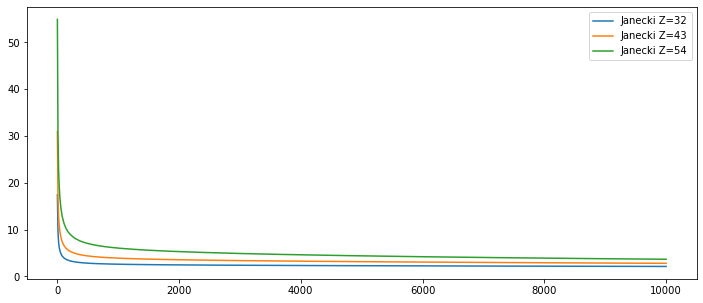

In [23]:
plt.figure(figsize=(12,5))
plt.plot(e_e, Janecki_func(e_e, Janecki_Z32), label='Janecki Z=32')
plt.plot(e_e, Janecki_func(e_e, Janecki_Z43), label='Janecki Z=43')
plt.plot(e_e, Janecki_func(e_e, Janecki_Z54), label='Janecki Z=54')
plt.legend()
plt.show()

In [24]:
Fermi_Semenov_Z54 = Fermi_via_Gamma(Z_127Xe, A_127Xe, e_e)
Fermi_corr_Z54 = Fermi_via_Gamma_corr(Z_127Xe, A_127Xe, e_e)
Fermi_corr2_Z54 = Fermi_via_Gamma_corr2(Z_127Xe, A_127Xe, e_e)
Fermi_kappa_Z54 = Fermi_via_Gamma_kappa(Z_127Xe, A_127Xe, e_e)

Fermi_total_Z54 = Fermi_func_total(Z_127Xe, A_127Xe, e_e)

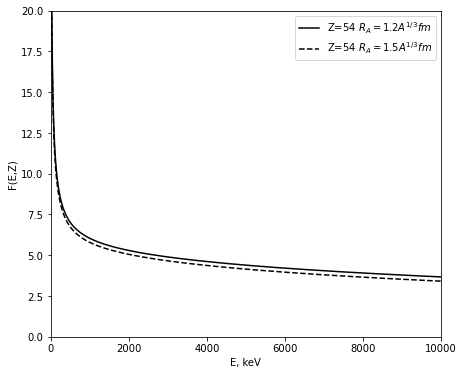

In [25]:
plt.figure(figsize=(7,6))
#plt.plot(e_e, Janecki_func(e_e, Janecki_Z54), c='green', label='Janecki Z=54')
#plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), c='red', label='Suslov Z=54')
plt.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125), c = 'k', ls = '-', label='Z=54 $R_A=1.2A^{1/3}fm$')
plt.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625), c = 'k', ls = '--', label=r'Z=54 $R_A=1.5A^{1/3}fm$')
#plt.plot(e_e, Fermi_kappa_Z54, c = 'k', ls = ':', label='Fermi corr kappa Z=54')
plt.xlim(0,10000)
plt.ylim(0,20)
plt.xlabel("E, keV")
plt.ylabel("F(E,Z)")
plt.legend()
#plt.savefig("fermi_func_comp_R.png", format='png', transparent=False, dpi=500)
plt.show()

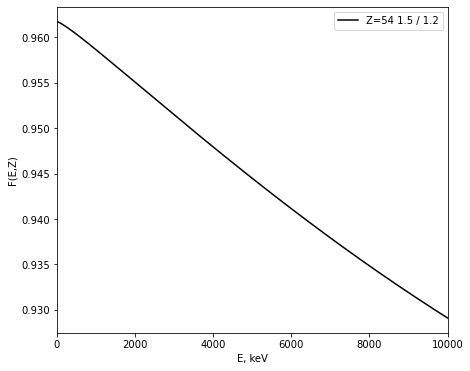

In [26]:
plt.figure(figsize=(7,6))
plt.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125), c = 'k', ls = '-', label='Z=54 1.5 / 1.2')
plt.xlim(0,10000)
#plt.ylim(0,20)
plt.xlabel("E, keV")
plt.ylabel("F(E,Z)")
plt.legend()
#plt.savefig("fermi_func_relat_R.png", format='png', transparent=False, dpi=500)
plt.show()

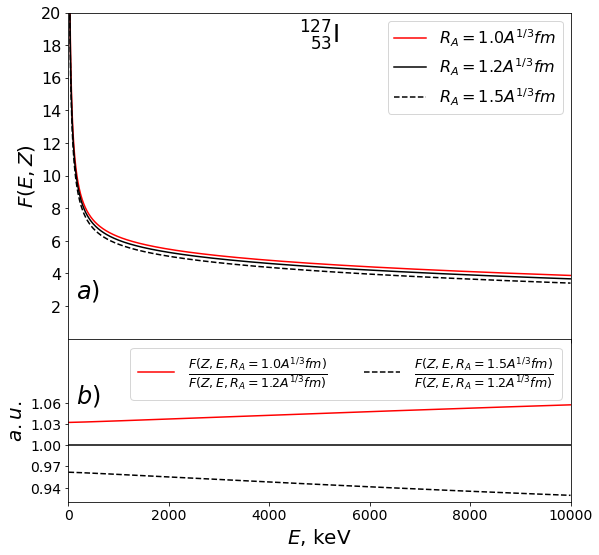

In [82]:
fig = plt.figure(figsize=(9,9))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])

ax0.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 2.60417), c = 'red', ls = '-', label=r'$R_A=1.0A^{1/3}fm$')
ax0.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125), c = 'k', ls = '-', label=r'$R_A=1.2A^{1/3}fm$')
ax0.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625), c = 'k', ls = '--', label=r'$R_A=1.5A^{1/3}fm$')
ax0.set_ylabel("$F(E,Z)$", fontsize=20)
#ax0.set_xlabel("E, keV")
ax0.set_ylim(0,20)
ax0.set_yticks(np.arange(2,22,2))


ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='minor', labelsize=16)

ax0.set_title('$^{127}_{~~53}$I', fontsize=24, pad=-30)

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 2.60417) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125), 
         c = 'red', ls = '-', label=r'$\frac{F(Z, E, R_A=1.0A^{1/3}fm)}{F(Z, E, R_A=1.2A^{1/3}fm)}$')
ax1.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125), 
         c = 'k', ls = '--', label=r'$\frac{F(Z, E, R_A=1.5A^{1/3}fm)}{F(Z, E, R_A=1.2A^{1/3}fm)}$')
ax1.set_xlabel("$E$, keV", fontsize=20)
ax1.set_ylabel("$a. u.$", fontsize=20)
ax1.set_ylim(0.92, 1.15)
ax1.hlines(1, 0, 10000, color='k')
#ax1.set_xlim(10,10000)
#ax1.set_ylim(0.6,1.25)
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

ax1.set_yticks(np.arange(0.94,1.08, 0.03))

# put lened on first subploсt
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')
ax0.legend(fontsize=16)
ax1.legend(loc='upper right', fontsize=18, ncol=4)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)

ax0.text( 150, 2.5, '$a)$', fontsize=24,)
ax1.text( 150, 1.06, '$b)$', fontsize=24,)
#ax1.text(-30, -1, 'b)', fontsize=16)

#ax0.set_xlim(0,10^4)
ax1.set_xlim(0,10000)

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.tight_layout()
plt.savefig("fermi_func_comp_R.png", format='png', bbox_inches="tight", transparent=False, dpi=500)

plt.show()

In [74]:
a = Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 2.60417) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125)
b = Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125)
np.round([a[-1], a[0], a[-1] - a[0], b[-1], b[0], b[-1] - b[0]], decimals=4)

array([ 1.0568,  1.0319,  0.0248,  0.9291,  0.9617, -0.0326])

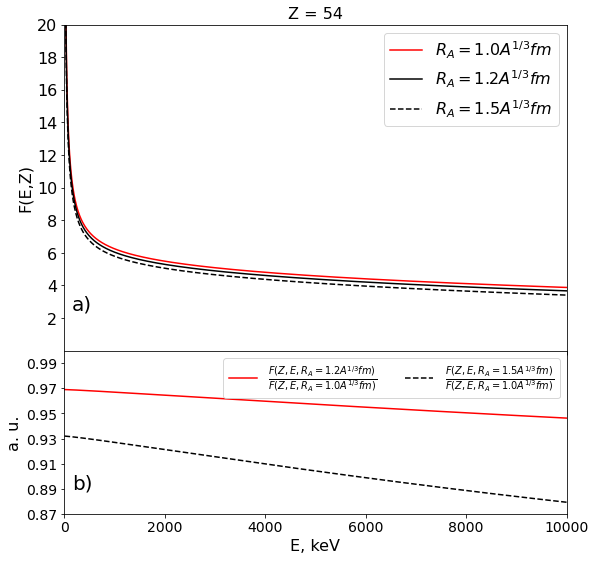

In [48]:
fig = plt.figure(figsize=(9,9))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])

ax0.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 2.60417), c = 'red', ls = '-', label=r'$R_A=1.0A^{1/3}fm$')
ax0.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125), c = 'k', ls = '-', label=r'$R_A=1.2A^{1/3}fm$')
ax0.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625), c = 'k', ls = '--', label=r'$R_A=1.5A^{1/3}fm$')
ax0.set_ylabel("F(E,Z)", fontsize=16)
#ax0.set_xlabel("E, keV")
ax0.set_ylim(0,20)
ax0.set_yticks(np.arange(2,22,2))


ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='minor', labelsize=16)

ax0.set_title('Z = 54', fontsize=16)

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.125) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 2.60417), 
         c = 'red', ls = '-', label=r'$\frac{F(Z, E, R_A=1.2A^{1/3}fm)}{F(Z, E, R_A=1.0A^{1/3}fm)}$')
ax1.plot(e_e, Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 3.90625) / Fermi_func_total(Z_127Xe, A_127Xe, e_e, r = 2.60417), 
         c = 'k', ls = '--', label=r'$\frac{F(Z, E, R_A=1.5A^{1/3}fm)}{F(Z, E, R_A=1.0A^{1/3}fm)}$')
ax1.set_xlabel("E, keV", fontsize=16)
ax1.set_ylabel("a. u.", fontsize=16)
ax1.set_ylim(0.87, 1.)
#ax1.hlines(1, 0, 10000, color='k')
#ax1.set_xlim(10,10000)
#ax1.set_ylim(0.6,1.25)
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

ax1.set_yticks(np.arange(0.87,1, 0.02))

# put lened on first subploсt
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')
ax0.legend(fontsize=16)
ax1.legend(loc='upper right', fontsize=14, ncol=4)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)

ax0.text( 150, 2.5, 'a)', fontsize=20,)
ax1.text( 150, 0.89, 'b)', fontsize=20,)
#ax1.text(-30, -1, 'b)', fontsize=16)

#ax0.set_xlim(0,10^4)
ax1.set_xlim(0,10000)

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.tight_layout()
plt.savefig("fermi_func_comp_R2.png", format='png', bbox_inches="tight", transparent=False, dpi=500)

plt.show()

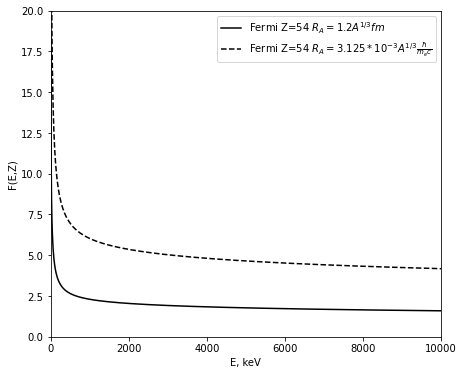

In [68]:
plt.figure(figsize=(7,6))
plt.plot(e_e, Fermi_Semenov_Z54, c = 'k', ls = '-', label='Fermi Z=54 $R_A=1.2A^{1/3}fm$')
plt.plot(e_e, Fermi_corr2_Z54, c = 'k', ls = '--', label=r'Fermi Z=54 $R_A=3.125*10^{-3}A^{1/3} \frac{\hbar}{m_ec}$')
#plt.plot(e_e, Fermi_kappa_Z54, c = 'k', ls = ':', label='Fermi corr kappa Z=54')
plt.xlim(0,10000)
plt.ylim(0,20)
plt.xlabel("E, keV")
plt.ylabel("F(E,Z)")
plt.legend()
plt.show()

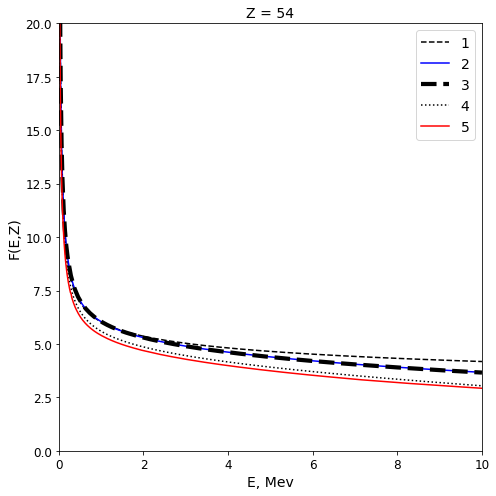

In [69]:
#plt.plot(e_e, (Janecki_func_L0(e_e, Janecki_Z54) ) * (Fermi_Semenov_Z54)**1, ls=':', label='Janecki corr Z=54')
#plt.plot(e_e, (Suslov_func(e_e, Suslov_Z53) / Fermi_Semenov_Z54) * Fermi_Semenov2_Z54, ls=':', label='Suslov corr Z=54')

scale_factor = 1000

plt.figure(figsize=(7,7))
plt.plot(e_e / scale_factor, Fermi_corr2_Z54, c = 'k', ls = '--', label='1')
plt.plot(e_e / scale_factor, Fermi_total_Z54, c = 'blue', ls = '-', label='2')
plt.plot(e_e / scale_factor, Janecki_func(e_e, Janecki_Z54), c='k', linewidth=4.2, ls='--', label='3')
plt.plot(e_e / scale_factor, Fermi_kappa_Z54, c = 'k', ls = ':', label='4')
plt.plot(e_e / scale_factor, Suslov_func(e_e, Suslov_Z53), c='red', label='5')
#plt.plot(e_e, Fermi_Semenov_Z54, c = 'k', ls = '-', label='Fermi not corr Z=54')
plt.xlim(0,10)
plt.ylim(0,20)
plt.xlabel("E, Mev", fontsize=14)
plt.ylabel("F(E,Z)", fontsize=14)
plt.title('Z = 54', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig("fermi_func_comparison.png", format='png', transparent=False, dpi=500)
plt.show()

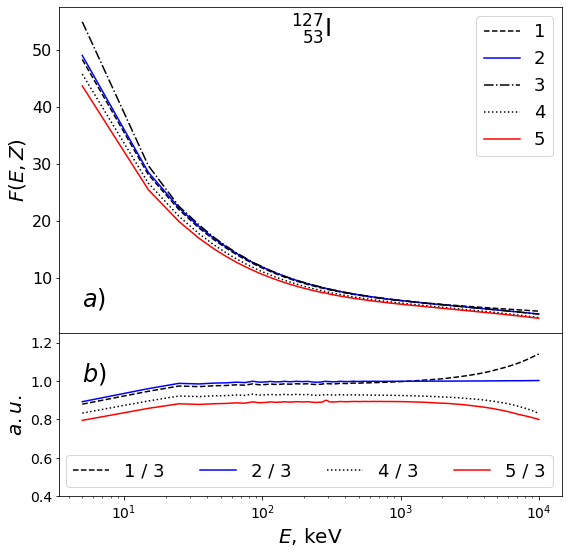

In [85]:
fig = plt.figure(figsize=(9,9))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(e_e, Fermi_corr2_Z54, c = 'k', ls = '--', label='1')
plt.plot(e_e, Fermi_total_Z54, c = 'blue', ls = '-', label='2')
ax0.plot(e_e, Janecki_func(e_e, Janecki_Z54), c='k', ls='-.', label='3')
ax0.plot(e_e, Fermi_kappa_Z54, c = 'k', ls = ':', label='4')
ax0.plot(e_e, Suslov_func(e_e, Suslov_Z53), c='red', label='5')
ax0.set_ylabel("$F(E,Z)$", fontsize=20)
#ax0.set_xlabel("E, keV")
#ax0.set_ylim(0,20)
ax0.set_xscale('log')


ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='minor', labelsize=16)

#ax0.set_title('Z = 54', fontsize=24, pad=-30)
ax0.set_title('$^{127}_{~~53}$I', fontsize=24, pad=-30)

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(e_e, Fermi_corr2_Z54 / Janecki_func(e_e, Janecki_Z54), c = 'k', ls = '--', 
         label=r'1 / 3')
ax1.plot(e_e, Fermi_total_Z54 / Janecki_func(e_e, Janecki_Z54), c = 'blue', ls = '-', 
         label=r'2 / 3')
ax1.plot(e_e, Fermi_kappa_Z54 / Janecki_func(e_e, Janecki_Z54), c = 'k', ls = ':', 
               label=r'4 / 3')
ax1.plot(e_e, Suslov_func(e_e, Suslov_Z53) / Janecki_func(e_e, Janecki_Z54), c='red', 
               label=r'5 / 3')
ax1.set_xlabel("$E$, keV", fontsize=20)
ax1.set_ylabel("$a. u.$", fontsize=20)
#ax1.set_xlim(10,10000)
ax1.set_ylim(0.4,1.25)
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
ax1.set_xscale('log')

# put lened on first subploсt
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')
ax0.legend(fontsize=18)
ax1.legend(loc='lower right', fontsize=18, ncol=4)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.tick_params(axis='both', which='minor', labelsize=14)

ax0.text( 5, 5, '$a)$', fontsize=24,)
ax1.text( 5, 1.0, '$b)$', fontsize=24,)
#ax1.text(-30, -1, 'b)', fontsize=16)

#ax0.set_xlim(0,10^4)
#ax1.set_xlim(0,10^4)

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
#plt.tight_layout()
plt.savefig("fermi_func_comparison2.png", format='png', bbox_inches="tight", transparent=False, dpi=500)

plt.show()

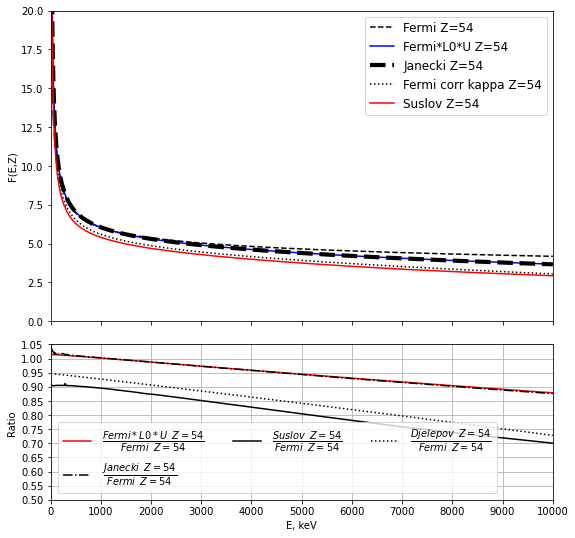

In [70]:
fig = plt.figure(figsize=(9,9))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(e_e, Fermi_corr2_Z54, c = 'k', ls = '--', label='Fermi Z=54')
plt.plot(e_e, Fermi_total_Z54, c = 'blue', ls = '-', label='Fermi*L0*U Z=54')
ax0.plot(e_e, Janecki_func(e_e, Janecki_Z54), c='k', linewidth=4.2, ls='--', label='Janecki Z=54')
ax0.plot(e_e, Fermi_kappa_Z54, c = 'k', ls = ':', label='Fermi corr kappa Z=54')
ax0.plot(e_e, Suslov_func(e_e, Suslov_Z53), c='red', label='Suslov Z=54')
ax0.set_ylabel("F(E,Z)")
#ax0.set_xlabel("E, keV")
ax0.set_ylim(0,20)

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(e_e, Fermi_total_Z54/Fermi_corr2_Z54, color='red', linestyle='-', 
         label=r'$\frac{Fermi*L0*U\;\;Z=54}{Fermi\;\;Z=54}$')
ax1.plot(e_e, Janecki_func(e_e, Janecki_Z54)/Fermi_corr2_Z54, color='k', linestyle='-.', 
         label=r'$\frac{Janecki\;\;Z=54}{Fermi\;\;Z=54}$')
ax1.plot(e_e, Suslov_func(e_e, Suslov_Z53)/Fermi_corr2_Z54, color='k', linestyle='-', 
               label=r'$\frac{Suslov\;\;Z=54}{Fermi\;\;Z=54}$')
ax1.plot(e_e, Fermi_kappa_Z54/Fermi_corr2_Z54, color='k', linestyle=':', 
               label=r'$\frac{Djelepov\;\;Z=54}{Fermi\;\;Z=54}$')
ax1.set_xlabel("E, keV")
ax1.set_ylabel("Ratio")
ax1.set_xticks(np.arange(0,11000,1000))
ax1.set_yticks(np.arange(0.5,1.1000,0.05))
ax1.set_xlim(0,10000)
ax1.set_ylim(0.5,1.05)
ax1.grid(True)
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
#yticks = ax.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)

# put lened on first subploсt
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')
ax0.legend(fontsize=12)
ax1.legend(loc='lower left', fontsize=14, ncol=3)

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.1)
plt.show()

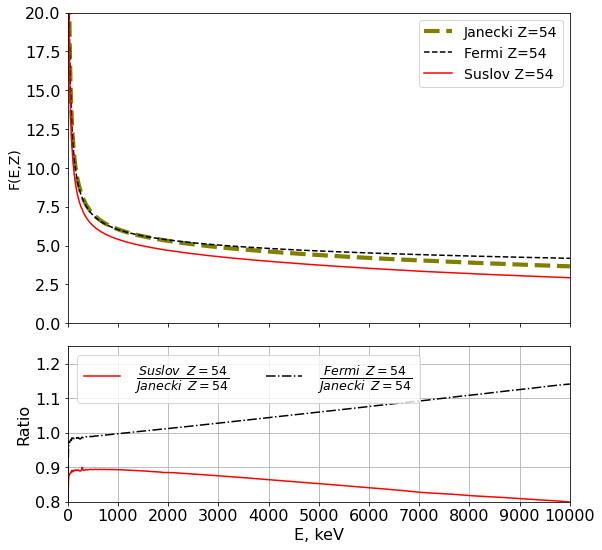

In [97]:
fig = plt.figure(figsize=(9,9))
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
ax0.plot(e_e, Janecki_func(e_e, Janecki_Z54), c='olive', linewidth=4.2, ls='--', label='Janecki Z=54')
ax0.plot(e_e, Fermi_corr2_Z54, c = 'k', ls = '--', label=r'Fermi Z=54')
ax0.plot(e_e, Suslov_func(e_e, Suslov_Z53), c='red', label='Suslov Z=54')
ax0.set_ylabel("F(E,Z)", fontsize=14)
#ax0.set_xlabel("E, keV")
ax0.set_ylim(0,20)
ax0.yaxis.set_tick_params(labelsize=16)


#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(e_e, Suslov_func(e_e, Suslov_Z53)/Janecki_func(e_e, Janecki_Z54), color='red', linestyle='-', label=r'$\frac{Suslov\;\;Z=54}{Janecki\;\;Z=54}$')
ax1.plot(e_e, Fermi_corr2_Z54/Janecki_func(e_e, Janecki_Z54), color='k', linestyle='-.', label=r'$\frac{Fermi\;\;Z=54}{Janecki\;\;Z=54}$')
ax1.set_xlabel("E, keV", fontsize=16)
ax1.set_ylabel("Ratio", fontsize=16)
ax1.set_xticks(np.arange(0,11000,1000),)
ax1_y = ax1.set_yticks(np.arange(0.5,1.3,0.1),)
ax1.set_xlim(0,10000)
ax1.set_ylim(0.8,1.25)
ax1.grid(True)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.xaxis.set_tick_params(labelsize=16)
#ax1.set_xticklabels( fontsize=14)
plt.setp(ax0.get_xticklabels(), visible=False, fontsize=16)
# remove last tick label for the second subplot
#yticks = ax.yaxis.get_major_ticks()
#yticks[-1].label1.set_visible(False)

# put lened on first subplot
#ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')
ax0.legend(fontsize=14)
ax1.legend(loc='upper left', fontsize=18, ncol=3)

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.1)
plt.show()

In [74]:
#from IPython.display import Image
#Image(filename='../../fermi_func_tables/janecki_z=54_err.jpg')

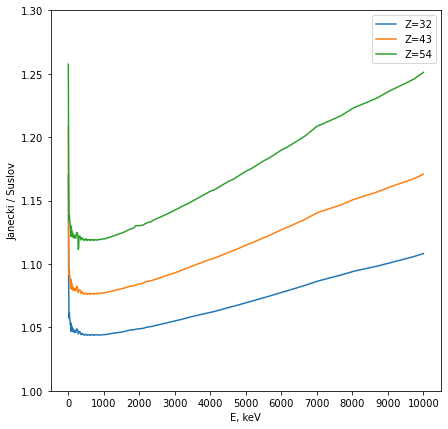

In [75]:
Z32 = Janecki_func(e_e, Janecki_Z32)/ Suslov_func(e_e, Suslov_Z31)
Z43 = Janecki_func(e_e, Janecki_Z43)/ Suslov_func(e_e, Suslov_Z42)
Z54 = Janecki_func(e_e, Janecki_Z54)/ Suslov_func(e_e, Suslov_Z53)

plt.figure(figsize=(7,7))
plt.plot(e_e, Z32, label='Z=32')
plt.plot(e_e, Z43, label='Z=43')
plt.plot(e_e, Z54, label='Z=54')
plt.legend()
#plt.xlim(300,2000)
plt.ylim(1,1.3)
plt.xlabel("E, keV")
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel("Janecki / Suslov")

#plt.savefig("Janecki_div_Suslov.png", format='png', transparent=False, dpi=500)

plt.show()

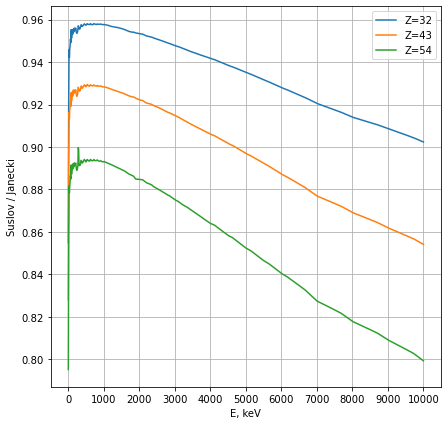

In [71]:
Z32 = Suslov_func(e_e, Suslov_Z31) / Janecki_func(e_e, Janecki_Z32)
Z43 = Suslov_func(e_e, Suslov_Z42) / Janecki_func(e_e, Janecki_Z43)
Z54 = Suslov_func(e_e, Suslov_Z53) / Janecki_func(e_e, Janecki_Z54)

plt.figure(figsize=(7,7))
plt.plot(e_e, Z32, label='Z=32')
plt.plot(e_e, Z43, label='Z=43')
plt.plot(e_e, Z54, label='Z=54')
plt.legend()
#plt.xlim(300,2000)
#plt.ylim(1,1.3)
plt.xlabel("E, keV")
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel("Suslov / Janecki")
plt.grid()

#plt.savefig("Janecki_div_Suslov.png", format='png', transparent=False, dpi=500)

plt.show()

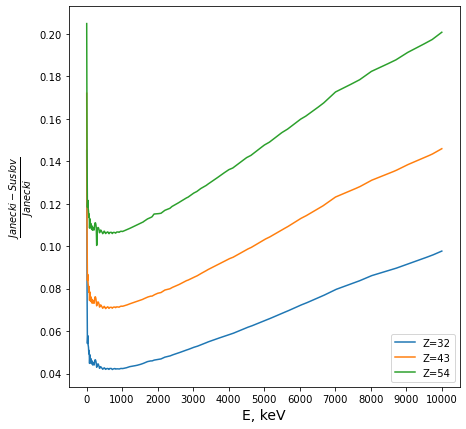

In [77]:
Z32 = ( Janecki_func(e_e, Janecki_Z32) - Suslov_func(e_e, Suslov_Z31) ) / Janecki_func(e_e, Janecki_Z32)
Z43 = ( Janecki_func(e_e, Janecki_Z43) - Suslov_func(e_e, Suslov_Z42) ) / Janecki_func(e_e, Janecki_Z43)
Z54 = ( Janecki_func(e_e, Janecki_Z54) - Suslov_func(e_e, Suslov_Z53) ) / Janecki_func(e_e, Janecki_Z54)

plt.figure(figsize=(7,7))
plt.plot(e_e, Z32, label='Z=32')
plt.plot(e_e, Z43, label='Z=43')
plt.plot(e_e, Z54, label='Z=54')
plt.legend()
#plt.xlim(300,2000)
#plt.ylim(1,1.5)
plt.xlabel("E, keV", fontsize=14)
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel(r'$\frac{Janecki - Suslov}{Janecki}$', fontsize=14)

#plt.savefig("Janecki_div_Suslov.png", format='png', transparent=False, dpi=500)

plt.show()

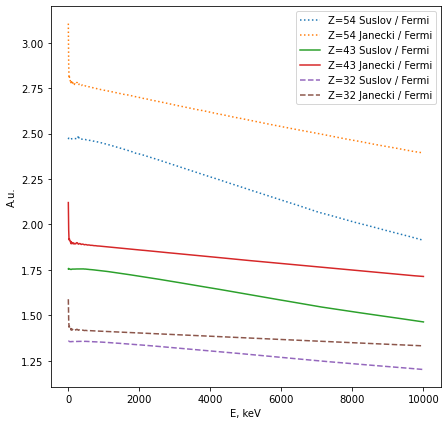

In [78]:
F_Suslov_Z43 =  Suslov_func(e_e, Suslov_Z42) / Fermi_Semenov_Z43 
F_Janecki_Z43 = Janecki_func(e_e, Janecki_Z43) / Fermi_Semenov_Z43 

F_Suslov_Z32 = Suslov_func(e_e, Suslov_Z31) / Fermi_Semenov_Z32
F_Janecki_Z32 = Janecki_func(e_e, Janecki_Z32) / Fermi_Semenov_Z32

F_Suslov_Z54 = Suslov_func(e_e, Suslov_Z53) / Fermi_Semenov_Z54
F_Janecki_Z54 = Janecki_func(e_e, Janecki_Z54) / Fermi_Semenov_Z54

plt.figure(figsize=(7,7))

plt.plot(e_e, F_Suslov_Z54, ls = ":", label='Z=54 Suslov / Fermi')
plt.plot(e_e, F_Janecki_Z54, ls = ":", label='Z=54 Janecki / Fermi')

plt.plot(e_e, F_Suslov_Z43, label='Z=43 Suslov / Fermi')
plt.plot(e_e, F_Janecki_Z43, label='Z=43 Janecki / Fermi')

plt.plot(e_e, F_Suslov_Z32, ls = "--", label='Z=32 Suslov / Fermi')
plt.plot(e_e, F_Janecki_Z32, ls = "--", label='Z=32 Janecki / Fermi')

plt.legend()
#plt.xlim(300,2000)
#plt.ylim(0,1)
#plt.xticks(np.arange(0,11000, 1000))
#plt.yticks(np.arange(0,1, 0.1))
plt.xlabel("E, keV")
plt.ylabel("A.u.")

#plt.savefig("Fermi_div_others.png", format='png', transparent=False, dpi=500)

plt.show()

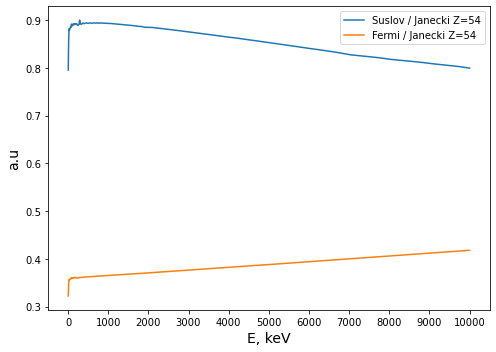

In [79]:

plt.figure(figsize=(7,5))
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53) / Janecki_func(e_e, Janecki_Z54), label='Suslov / Janecki Z=54')
plt.plot(e_e, Fermi_Semenov_Z54 / Janecki_func(e_e, Janecki_Z54), label='Fermi / Janecki Z=54')
plt.legend()
#plt.xlim(300,2000)
#plt.ylim(1,1.5)
plt.xlabel("E, keV", fontsize=14)
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel('a.u', fontsize=14)
plt.legend()

#plt.savefig("fermi_func_rel1.png", format='png', transparent=False, dpi=500)
plt.tight_layout()

plt.show()

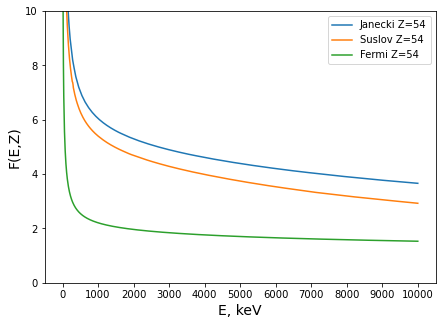

In [81]:
plt.figure(figsize=(7,5))
plt.plot(e_e, Janecki_func(e_e, Janecki_Z54), label='Janecki Z=54')
plt.plot(e_e, Suslov_func(e_e, Suslov_Z53), label='Suslov Z=54')
plt.plot(e_e, Fermi_Semenov_Z54, label='Fermi Z=54')
plt.legend()
#plt.xlim(300,2000)
plt.ylim(0,10)
plt.xlabel("E, keV", fontsize=14)
plt.xticks(np.arange(0,11000, 1000))
plt.ylabel('F(E,Z)', fontsize=14)
plt.legend()

#plt.savefig("fermi_func_rel2.png", format='png', transparent=False, dpi=500)

plt.show()